<a href="https://colab.research.google.com/github/yeomny/connect-ssh/blob/master/3%EC%9D%BC%EC%B0%A8_EDA_%EB%B6%80%ED%8A%B8%EC%BA%A0%ED%94%84(0627).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/구매내역정보.csv', encoding='cp949')
df

,ID,거래식별ID,점포ID,거래일자,거래시간대,상품대분류명,상품중분류명,구매수량,구매금액
0,B000001,Z000403,B,20140704,21,청과,감귤수박국산기타,1,12900
1,B000001,Z000677,B,20140707,14,낙농,우유,2,1700
2,B000001,Z000677,B,20140707,14,면과자,빵,1,1800
3,B000001,Z001259,B,20140714,17,음주류,주류,1,11200
4,B000001,Z001364,B,20140715,18,낙농,발효유,1,2200
...,...,...,...,...,...,...,...,...,...
55828,B001500,Z016472,A,20140830,16,야채,두채류,1,2290
55829,B001500,Z019236,A,20140920,20,음주류,주류,1,1300
55830,B001500,Z019741,A,20140923,13,낙농,발효유,1,1700
55831,B001500,Z020273,A,20140926,20,야채,계란류,1,4990


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55833 entries, 0 to 55832
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      55833 non-null  object
 1   거래식별ID  55833 non-null  object
 2   점포ID    55833 non-null  object
 3   거래일자    55833 non-null  int64 
 4   거래시간대   55833 non-null  int64 
 5   상품대분류명  55833 non-null  object
 6   상품중분류명  55833 non-null  object
 7   구매수량    55833 non-null  int64 
 8   구매금액    55833 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.8+ MB


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# 구글 코랩에 한글 폰트 설치
!apt-get update -qq
!apt-get install -qq -y fonts-nanum


# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


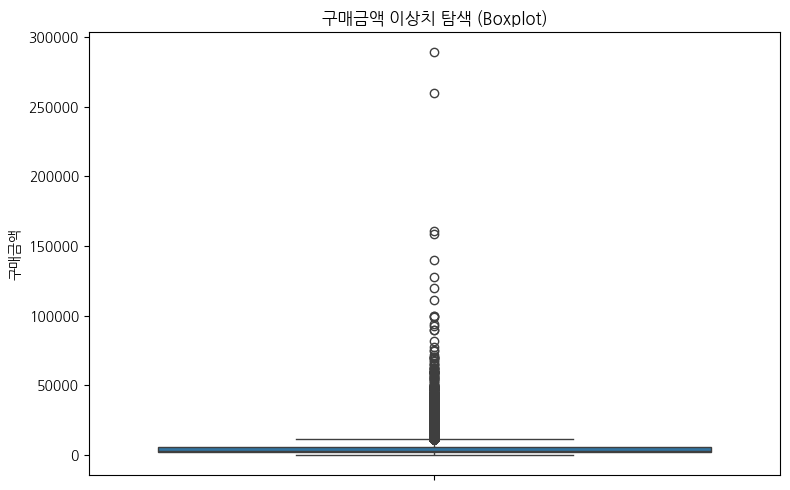

In [ ]:
# 박스플롯 그리기
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))  # 그래프 크기 지정
sns.boxplot(y=df['구매금액'])  # y축에 '구매금액' 컬럼
plt.title('구매금액 이상치 탐색 (Boxplot)')
plt.ylabel('구매금액')
plt.tight_layout()
plt.show()


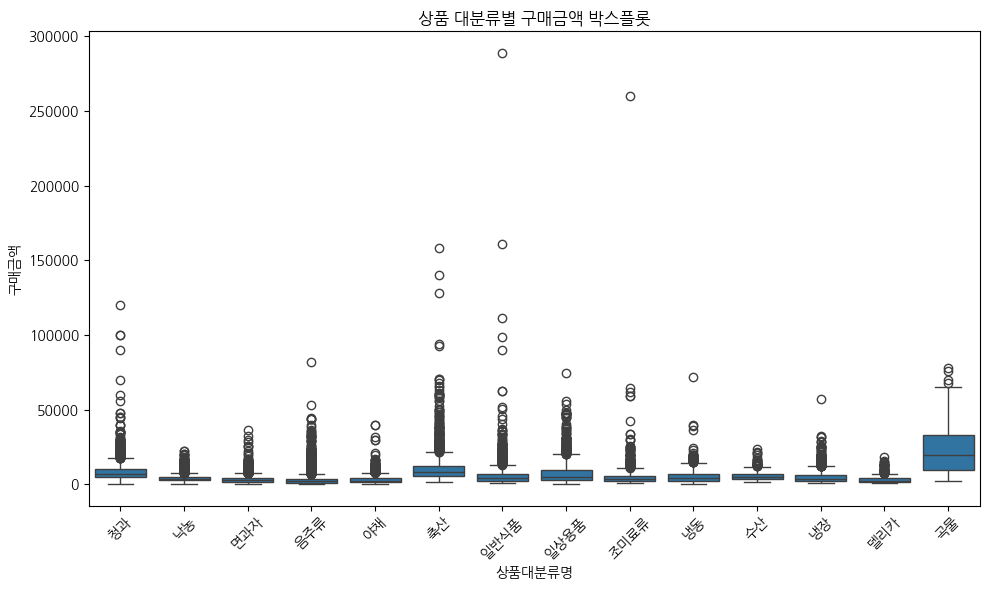

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='상품대분류명', y='구매금액', data=df)
plt.title('상품 대분류별 구매금액 박스플롯')
plt.xlabel('상품대분류명')
plt.ylabel('구매금액')
plt.xticks(rotation=45)  # 글자가 겹칠 경우 회전
plt.tight_layout()
plt.show()


In [ ]:
# '거래일자' int -> str 으로 변경
df['거래일자']=df['거래일자'].astype(str)

In [ ]:
df.dtypes

,0
ID,object
거래식별ID,object
점포ID,object
거래일자,object
거래시간대,int64
상품대분류명,object
상품중분류명,object
구매수량,int64
구매금액,int64


In [ ]:
# 앞 6자리 yyyymm 잘라서 '월' 파생변수 생성
df['월']=df['거래일자'].str[ :6 ]
df

,ID,거래식별ID,점포ID,거래일자,거래시간대,상품대분류명,상품중분류명,구매수량,구매금액,월
0,B000001,Z000403,B,20140704,21,청과,감귤수박국산기타,1,12900,201407
1,B000001,Z000677,B,20140707,14,낙농,우유,2,1700,201407
2,B000001,Z000677,B,20140707,14,면과자,빵,1,1800,201407
3,B000001,Z001259,B,20140714,17,음주류,주류,1,11200,201407
4,B000001,Z001364,B,20140715,18,낙농,발효유,1,2200,201407
...,...,...,...,...,...,...,...,...,...,...
55828,B001500,Z016472,A,20140830,16,야채,두채류,1,2290,201408
55829,B001500,Z019236,A,20140920,20,음주류,주류,1,1300,201409
55830,B001500,Z019741,A,20140923,13,낙농,발효유,1,1700,201409
55831,B001500,Z020273,A,20140926,20,야채,계란류,1,4990,201409


In [ ]:
df.describe()

,거래시간대,구매수량,구매금액
count,55833.000000,55833.000000,55833.000000
mean,17.074544,1.623663,4644.907259
std,3.308774,2.010506,5402.976512
min,10.000000,1.000000,100.000000
25%,15.000000,1.000000,1990.000000
50%,18.000000,1.000000,3300.000000
75%,20.000000,2.000000,5800.000000
max,22.000000,100.000000,289000.000000


In [ ]:
# 거래일자의 요일 가져오기
df['거래일자']=pd.to_datetime(df['거래일자'], format='%Y%m%d')

df['요일']=df['거래일자'].dt.day_name()
df

,ID,거래식별ID,점포ID,거래일자,거래시간대,상품대분류명,상품중분류명,구매수량,구매금액,월,요일
0,B000001,Z000403,B,2014-07-04,21,청과,감귤수박국산기타,1,12900,201407,Friday
1,B000001,Z000677,B,2014-07-07,14,낙농,우유,2,1700,201407,Monday
2,B000001,Z000677,B,2014-07-07,14,면과자,빵,1,1800,201407,Monday
3,B000001,Z001259,B,2014-07-14,17,음주류,주류,1,11200,201407,Monday
4,B000001,Z001364,B,2014-07-15,18,낙농,발효유,1,2200,201407,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
55828,B001500,Z016472,A,2014-08-30,16,야채,두채류,1,2290,201408,Saturday
55829,B001500,Z019236,A,2014-09-20,20,음주류,주류,1,1300,201409,Saturday
55830,B001500,Z019741,A,2014-09-23,13,낙농,발효유,1,1700,201409,Tuesday
55831,B001500,Z020273,A,2014-09-26,20,야채,계란류,1,4990,201409,Friday


In [ ]:
df['시간대구분']=pd.cut(
    df['거래시간대'],
    bins=[0,6,12,18,24],
    labels=['심야','오전','오후','저녁'],
    right=False
)

df

,ID,거래식별ID,점포ID,거래일자,거래시간대,상품대분류명,상품중분류명,구매수량,구매금액,월,요일,시간대구분
0,B000001,Z000403,B,2014-07-04,21,청과,감귤수박국산기타,1,12900,201407,Friday,저녁
1,B000001,Z000677,B,2014-07-07,14,낙농,우유,2,1700,201407,Monday,오후
2,B000001,Z000677,B,2014-07-07,14,면과자,빵,1,1800,201407,Monday,오후
3,B000001,Z001259,B,2014-07-14,17,음주류,주류,1,11200,201407,Monday,오후
4,B000001,Z001364,B,2014-07-15,18,낙농,발효유,1,2200,201407,Tuesday,저녁
...,...,...,...,...,...,...,...,...,...,...,...,...
55828,B001500,Z016472,A,2014-08-30,16,야채,두채류,1,2290,201408,Saturday,오후
55829,B001500,Z019236,A,2014-09-20,20,음주류,주류,1,1300,201409,Saturday,저녁
55830,B001500,Z019741,A,2014-09-23,13,낙농,발효유,1,1700,201409,Tuesday,오후
55831,B001500,Z020273,A,2014-09-26,20,야채,계란류,1,4990,201409,Friday,저녁


In [ ]:
# 상품 대분류별 빈도수
df['상품대분류명'].value_counts(())

,count
상품대분류명,
야채,9959
면과자,9501
낙농,7810
음주류,5424
냉장,3837
청과,3392
일반식품,3278
냉동,2832
일상용품,2659


In [ ]:
# 시간대구분별 평균 구매금액
df.groupby('시간대구분')['구매금액'].sum()

/tmp/ipython-input-16-281450006.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('시간대구분')['구매금액'].sum()


,구매금액
시간대구분,
심야,0
오전,21735170
오후,111495003
저녁,126108934


In [ ]:
# 요일별 구매수량 합계 금액

df.groupby('요일')['구매금액'].sum()

,구매금액
요일,
Friday,37619702
Monday,40225169
Saturday,43624152
Sunday,21721653
Thursday,39605794
Tuesday,35852694
Wednesday,40689943


In [ ]:
# 고객(ID)별 구매금액 합계
df.groupby('ID')['구매금액'].sum().sort_values(ascending=False)

,구매금액
ID,
B001310,1424099
B000286,1364150
B000345,1314399
B000136,1226967
B000565,1180661
...,...
B000030,990
B000274,880
B001184,770


In [ ]:
# 상품중분류별 구매금액 합계(상품대분류명=='낙농')
df[df['상품대분류명'] =='낙농' ].groupby('상품중분류명')['구매금액'].sum()

,구매금액
상품중분류명,
냉장음료,3115090
발효유,7641720
우유,15567970
치즈버터,2957910


In [ ]:
# 파생변수 : 단가 생성해보세요
df['단가']=df['구매금액'] / df['구매수량']
df

,ID,거래식별ID,점포ID,거래일자,거래시간대,상품대분류명,상품중분류명,구매수량,구매금액,월,요일,시간대구분,단가
0,B000001,Z000403,B,2014-07-04,21,청과,감귤수박국산기타,1,12900,201407,Friday,저녁,12900.0
1,B000001,Z000677,B,2014-07-07,14,낙농,우유,2,1700,201407,Monday,오후,850.0
2,B000001,Z000677,B,2014-07-07,14,면과자,빵,1,1800,201407,Monday,오후,1800.0
3,B000001,Z001259,B,2014-07-14,17,음주류,주류,1,11200,201407,Monday,오후,11200.0
4,B000001,Z001364,B,2014-07-15,18,낙농,발효유,1,2200,201407,Tuesday,저녁,2200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55828,B001500,Z016472,A,2014-08-30,16,야채,두채류,1,2290,201408,Saturday,오후,2290.0
55829,B001500,Z019236,A,2014-09-20,20,음주류,주류,1,1300,201409,Saturday,저녁,1300.0
55830,B001500,Z019741,A,2014-09-23,13,낙농,발효유,1,1700,201409,Tuesday,오후,1700.0
55831,B001500,Z020273,A,2014-09-26,20,야채,계란류,1,4990,201409,Friday,저녁,4990.0


In [ ]:
# 점포별 매출 순위별로 출력
df.groupby('점포ID')['구매금액'].sum().sort_values(ascending=False)

,구매금액
점포ID,
A,153786588
B,105552519


In [ ]:
# 시간대구분 == 오전 과 시간대구분 == 저녁에 구매금액의 차이가 있을거다.
from scipy.stats import ttest_ind

# 1. 오전 그룹, 저녁 그룹 뽑아서 나누기
mor = df[df['시간대구분']=='오전']['구매금액']
even = df[df['시간대구분']=='저녁']['구매금액']

# 2. 독립표본 t검정
t_test,p_value=ttest_ind(mor,  even, equal_var=False )
print("t_test", t_test)
print("p_value", p_value)

t_test 7.3861644940741815
p_value 1.751912175483779e-13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55833 entries, 0 to 55832
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      55833 non-null  object        
 1   거래식별ID  55833 non-null  object        
 2   점포ID    55833 non-null  object        
 3   거래일자    55833 non-null  datetime64[ns]
 4   거래시간대   55833 non-null  int64         
 5   상품대분류명  55833 non-null  object        
 6   상품중분류명  55833 non-null  object        
 7   구매수량    55833 non-null  int64         
 8   구매금액    55833 non-null  int64         
 9   월       55833 non-null  object        
 10  요일      55833 non-null  object        
 11  시간대구분   55833 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 4.7+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55833 entries, 0 to 55832
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      55833 non-null  object
 1   거래식별ID  55833 non-null  object
 2   점포ID    55833 non-null  object
 3   거래일자    55833 non-null  int64 
 4   거래시간대   55833 non-null  int64 
 5   상품대분류명  55833 non-null  object
 6   상품중분류명  55833 non-null  object
 7   구매수량    55833 non-null  int64 
 8   구매금액    55833 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.8+ MB


In [ ]:
# '거래일자' 컬럼을 문자열 타입으로 변경
df['거래일자'] = df['거래일자'].astype(str)
df.dtypes

,0
ID,object
거래식별ID,object
점포ID,object
거래일자,object
거래시간대,int64
상품대분류명,object
상품중분류명,object
구매수량,int64
구매금액,int64


In [ ]:
# 앞 6자리 (YYYYMM) 잘라서 '월' 파생변수 만들기
df['월'] = df['거래일자'].str[:6]
df

,ID,거래식별ID,점포ID,거래일자,거래시간대,상품대분류명,상품중분류명,구매수량,구매금액,월
0,B000001,Z000403,B,20140704,21,청과,감귤수박국산기타,1,12900,201407
1,B000001,Z000677,B,20140707,14,낙농,우유,2,1700,201407
2,B000001,Z000677,B,20140707,14,면과자,빵,1,1800,201407
3,B000001,Z001259,B,20140714,17,음주류,주류,1,11200,201407
4,B000001,Z001364,B,20140715,18,낙농,발효유,1,2200,201407
...,...,...,...,...,...,...,...,...,...,...
55828,B001500,Z016472,A,20140830,16,야채,두채류,1,2290,201408
55829,B001500,Z019236,A,20140920,20,음주류,주류,1,1300,201409
55830,B001500,Z019741,A,20140923,13,낙농,발효유,1,1700,201409
55831,B001500,Z020273,A,20140926,20,야채,계란류,1,4990,201409


In [ ]:
df.describe()


,거래시간대,구매수량,구매금액
count,55833.000000,55833.000000,55833.000000
mean,17.074544,1.623663,4644.907259
std,3.308774,2.010506,5402.976512
min,10.000000,1.000000,100.000000
25%,15.000000,1.000000,1990.000000
50%,18.000000,1.000000,3300.000000
75%,20.000000,2.000000,5800.000000
max,22.000000,100.000000,289000.000000


In [ ]:
df.describe(include='all')

,ID,거래식별ID,점포ID,거래일자,거래시간대,상품대분류명,상품중분류명,구매수량,구매금액
count,55833,55833,55833,55833,55833.000000,55833,55833,55833.000000,55833.000000
unique,1462,19098,2,86,NaN,14,77,NaN,NaN
top,B001170,Z008656,A,20140917,NaN,야채,음료,NaN,NaN
freq,285,23,32113,963,NaN,9959,4647,NaN,NaN
mean,NaN,NaN,NaN,NaN,17.074544,NaN,NaN,1.623663,4644.907259
std,NaN,NaN,NaN,NaN,3.308774,NaN,NaN,2.010506,5402.976512
min,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000,100.000000
25%,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,1.000000,1990.000000
50%,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,1.000000,3300.000000
75%,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,2.000000,5800.000000


In [ ]:
df['거래일자'] = pd.to_datetime(df['거래일자'], format='%Y%m%d')
df['요일'] = df['거래일자'].dt.day_name()
df

,ID,거래식별ID,점포ID,거래일자,거래시간대,상품대분류명,상품중분류명,구매수량,구매금액,월,요일
0,B000001,Z000403,B,2014-07-04,21,청과,감귤수박국산기타,1,12900,201407,Friday
1,B000001,Z000677,B,2014-07-07,14,낙농,우유,2,1700,201407,Monday
2,B000001,Z000677,B,2014-07-07,14,면과자,빵,1,1800,201407,Monday
3,B000001,Z001259,B,2014-07-14,17,음주류,주류,1,11200,201407,Monday
4,B000001,Z001364,B,2014-07-15,18,낙농,발효유,1,2200,201407,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
55828,B001500,Z016472,A,2014-08-30,16,야채,두채류,1,2290,201408,Saturday
55829,B001500,Z019236,A,2014-09-20,20,음주류,주류,1,1300,201409,Saturday
55830,B001500,Z019741,A,2014-09-23,13,낙농,발효유,1,1700,201409,Tuesday
55831,B001500,Z020273,A,2014-09-26,20,야채,계란류,1,4990,201409,Friday


In [ ]:
# pd.cut() : 연속형 숫자 데이터를 구간별 범주형 데이터로 나눠주는 함수
# bins=[0, 6, 12, 18, 24]	구간 설정 → 06, 612, 1218, 1824
# right=False	구간의 오른쪽 경계를 포함하지 않겠다는 뜻 (예: 6은 포함 안 됨)

df['시간대구분'] = pd.cut(
    df['거래시간대'],
    bins=[0, 6, 12, 18, 24],
    labels=['심야', '오전', '오후', '저녁'],
    right=False
)
df

,ID,거래식별ID,점포ID,거래일자,거래시간대,상품대분류명,상품중분류명,구매수량,구매금액,월,요일,시간대구분
0,B000001,Z000403,B,2014-07-04,21,청과,감귤수박국산기타,1,12900,201407,Friday,저녁
1,B000001,Z000677,B,2014-07-07,14,낙농,우유,2,1700,201407,Monday,오후
2,B000001,Z000677,B,2014-07-07,14,면과자,빵,1,1800,201407,Monday,오후
3,B000001,Z001259,B,2014-07-14,17,음주류,주류,1,11200,201407,Monday,오후
4,B000001,Z001364,B,2014-07-15,18,낙농,발효유,1,2200,201407,Tuesday,저녁
...,...,...,...,...,...,...,...,...,...,...,...,...
55828,B001500,Z016472,A,2014-08-30,16,야채,두채류,1,2290,201408,Saturday,오후
55829,B001500,Z019236,A,2014-09-20,20,음주류,주류,1,1300,201409,Saturday,저녁
55830,B001500,Z019741,A,2014-09-23,13,낙농,발효유,1,1700,201409,Tuesday,오후
55831,B001500,Z020273,A,2014-09-26,20,야채,계란류,1,4990,201409,Friday,저녁


In [ ]:
# 상품 대분류별 빈도수
df['상품대분류명'].value_counts()


,count
상품대분류명,
야채,9959
면과자,9501
낙농,7810
음주류,5424
냉장,3837
청과,3392
일반식품,3278
냉동,2832
일상용품,2659


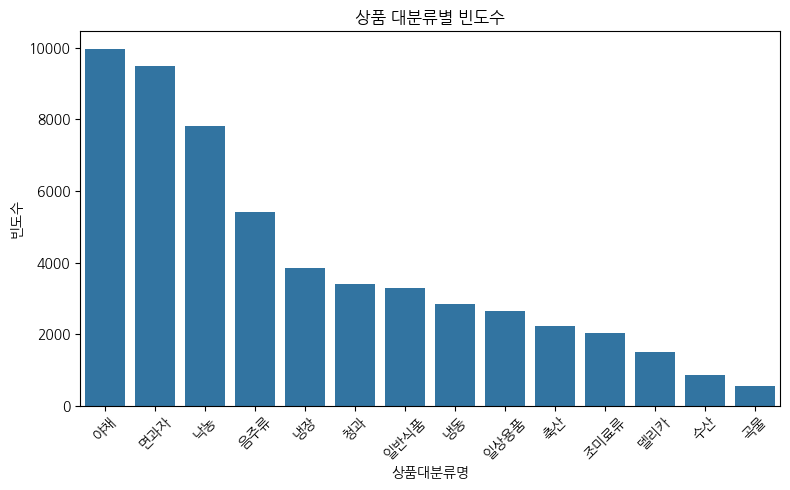

In [ ]:
# 1. 데이터 준비
category_counts = df['상품대분류명'].value_counts()

# 2. 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('상품 대분류별 빈도수')
plt.xlabel('상품대분류명')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 시간대구분별 평균 구매금액
df.groupby('시간대구분')['구매금액'].mean()


/tmp/ipython-input-51-3776330229.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('시간대구분')['구매금액'].mean()


,구매금액
시간대구분,
심야,NaN
오전,5132.271547
오후,4808.720909
저녁,4438.579966


/tmp/ipython-input-52-392162143.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_time = df.groupby('시간대구분')['구매금액'].mean().reset_index()


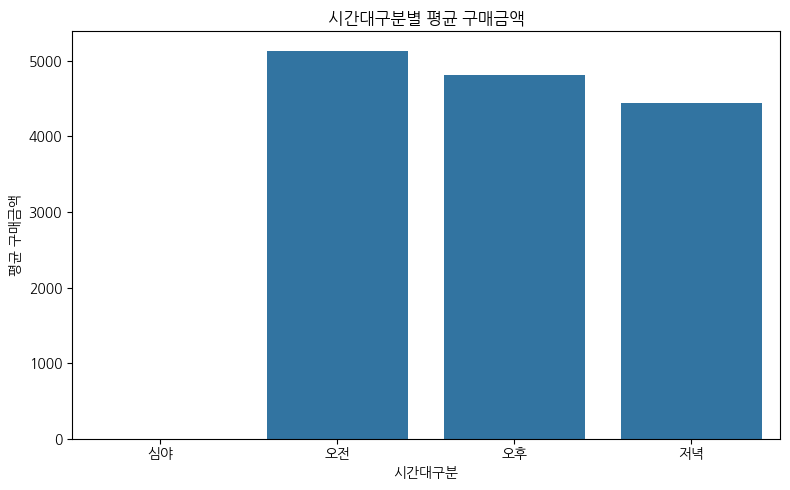

In [ ]:
# 1. 데이터 준비
mean_by_time = df.groupby('시간대구분')['구매금액'].mean().reset_index()

# 2. 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x='시간대구분', y='구매금액', data=mean_by_time)
plt.title('시간대구분별 평균 구매금액')
plt.xlabel('시간대구분')
plt.ylabel('평균 구매금액')
plt.tight_layout()
plt.show()

In [ ]:
# 요일별 총 구매수량
df.groupby('요일')['구매수량'].sum()


,구매수량
요일,
Friday,13981
Monday,13950
Saturday,15380
Sunday,7133
Thursday,13681
Tuesday,12592
Wednesday,13937


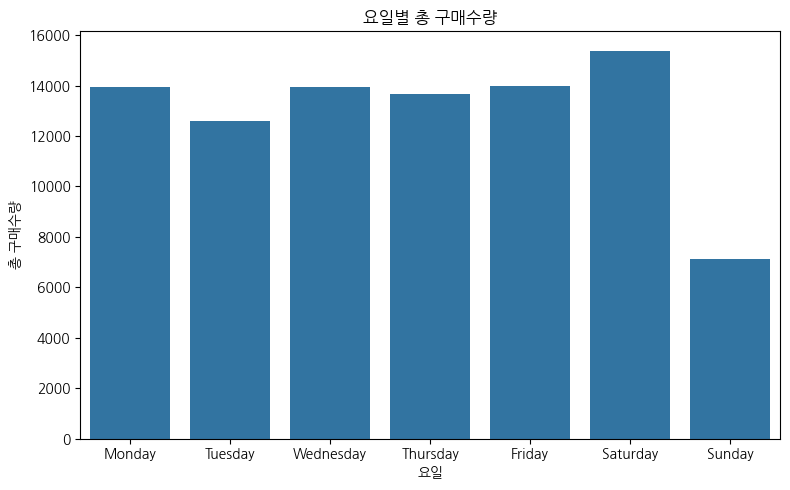

In [ ]:
# 1. 데이터 준비
qty_by_day = df.groupby('요일')['구매수량'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)  # 요일 정렬

# 2. 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=qty_by_day.index, y=qty_by_day.values)
plt.title('요일별 총 구매수량')
plt.xlabel('요일')
plt.ylabel('총 구매수량')
plt.tight_layout()
plt.show()

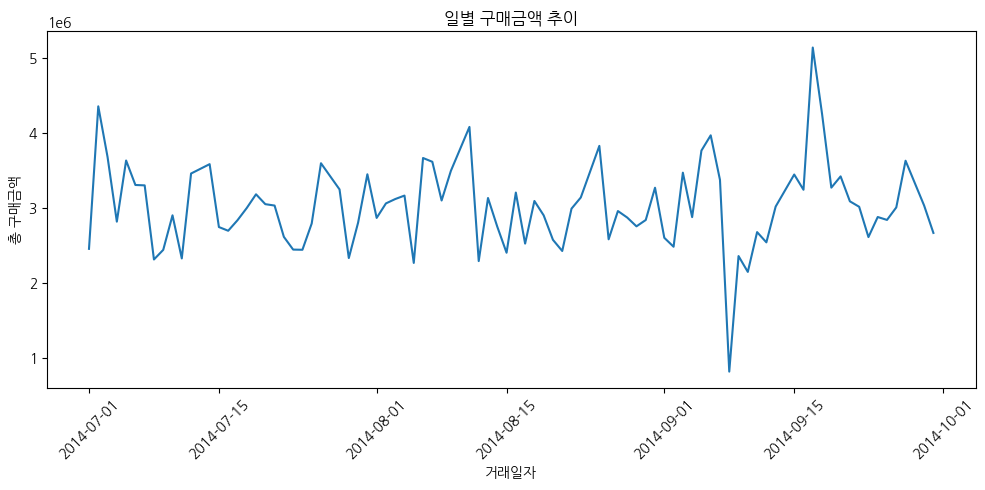

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 일별 구매금액 합계
daily_sales = df.groupby('거래일자')['구매금액'].sum().reset_index()

# 2. 시각화
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_sales, x='거래일자', y='구매금액')
plt.title('일별 구매금액 추이')
plt.xlabel('거래일자')
plt.ylabel('총 구매금액')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


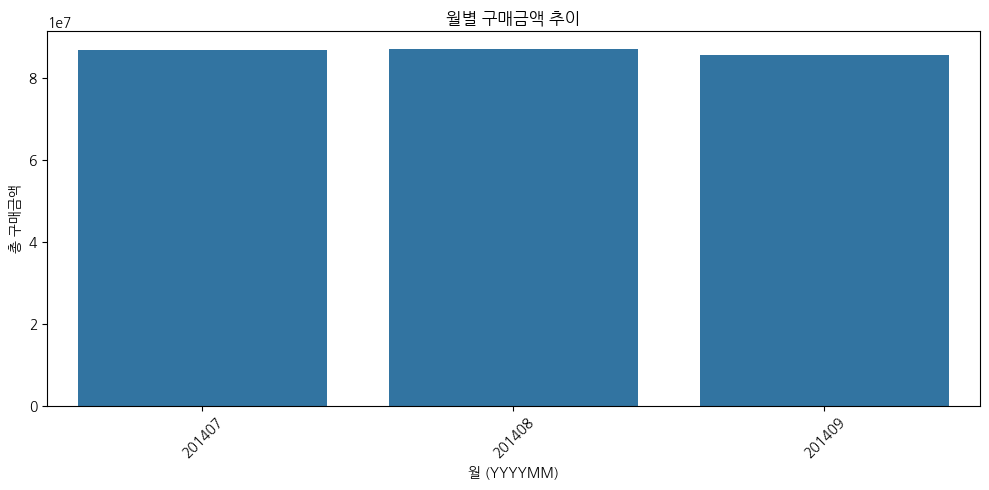

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 월별 구매금액 합계 구하기
monthly_sales = df.groupby('월')['구매금액'].sum().reset_index()

# 2. '월'을 시간순 정렬 (문자열이니까 오름차순 정렬 필요)
monthly_sales = monthly_sales.sort_values('월')

# 3. 시각화
plt.figure(figsize=(10, 5))
# sns.lineplot(data=monthly_sales, x='월', y='구매금액', marker='o')
sns.barplot(data=monthly_sales, x='월', y='구매금액')
plt.title('월별 구매금액 추이')
plt.xlabel('월 (YYYYMM)')
plt.ylabel('총 구매금액')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# 고객별 총 구매금액
df.groupby('ID')['구매금액'].sum().sort_values(ascending=False)


,구매금액
ID,
B001310,1424099
B000286,1364150
B000345,1314399
B000136,1226967
B000565,1180661
...,...
B000030,990
B000274,880
B001184,770


In [ ]:
# 상품대분류별 평균 구매단가
df.groupby('상품대분류명')['구매금액'].mean()


,구매금액
상품대분류명,
곡물,22100.865562
낙농,3749.384123
냉동,4656.182910
냉장,4645.298410
델리카,3105.668234
면과자,3153.692243
수산,5416.092417
야채,3012.288382
음주류,3350.224926


In [ ]:
# '낙농' 대분류의 상품중분류별 총 구매금액
df[df['상품대분류명'] == '낙농'].groupby('상품중분류명')['구매금액'].sum()


,구매금액
상품중분류명,
냉장음료,3115090
발효유,7641720
우유,15567970
치즈버터,2957910


In [ ]:
# '시간대구분별 구매수량 합계
df.groupby('시간대구분')['구매수량'].sum()


/tmp/ipython-input-22-243428576.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('시간대구분')['구매수량'].sum()


,구매수량
시간대구분,
심야,0
오전,7091
오후,38340
저녁,45223


In [ ]:
# 요일+시간대별 교차집
df.pivot_table(index='요일', columns='시간대구분', values='구매금액', aggfunc='sum')


/tmp/ipython-input-23-498434613.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='요일', columns='시간대구분', values='구매금액', aggfunc='sum')


시간대구분,심야,오전,오후,저녁
요일,,,,
Friday,0,2551568,15169751,19898383
Monday,0,3183291,17545196,19496682
Saturday,0,4527833,18707092,20389227
Sunday,0,2532022,10020822,9168809
Thursday,0,3500259,16845337,19260198
Tuesday,0,2330321,15016586,18505787
Wednesday,0,3109876,18190219,19389848


In [ ]:
# 구매금액 대비 수량 → 1개당 평균 단가 파생변수
df['단가'] = df['구매금액'] / df['구매수량']
df

,ID,거래식별ID,점포ID,거래일자,거래시간대,상품대분류명,상품중분류명,구매수량,구매금액,요일,시간대구분,단가
0,B000001,Z000403,B,2014-07-04,21,청과,감귤수박국산기타,1,12900,Friday,저녁,12900.0
1,B000001,Z000677,B,2014-07-07,14,낙농,우유,2,1700,Monday,오후,850.0
2,B000001,Z000677,B,2014-07-07,14,면과자,빵,1,1800,Monday,오후,1800.0
3,B000001,Z001259,B,2014-07-14,17,음주류,주류,1,11200,Monday,오후,11200.0
4,B000001,Z001364,B,2014-07-15,18,낙농,발효유,1,2200,Tuesday,저녁,2200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
55828,B001500,Z016472,A,2014-08-30,16,야채,두채류,1,2290,Saturday,오후,2290.0
55829,B001500,Z019236,A,2014-09-20,20,음주류,주류,1,1300,Saturday,저녁,1300.0
55830,B001500,Z019741,A,2014-09-23,13,낙농,발효유,1,1700,Tuesday,오후,1700.0
55831,B001500,Z020273,A,2014-09-26,20,야채,계란류,1,4990,Friday,저녁,4990.0


In [ ]:
# 요일별 전체 거래 건수
df['요일'].value_counts()


,count
요일,
Saturday,9264
Monday,8823
Wednesday,8629
Thursday,8560
Friday,8129
Tuesday,7892
Sunday,4536


In [ ]:
# 가장 자주 구매한 상품중분류 Top 5
df['상품중분류명'].value_counts().head(5)


,count
상품중분류명,
음료,4647
우유,4248
스낵,2885
두채류,2459
아이스크림,2303


In [ ]:
# 점포ID별 매출 순위
df.groupby('점포ID')['구매금액'].sum().sort_values(ascending=False)


,구매금액
점포ID,
A,153786588
B,105552519


In [ ]:
# 오전과 저녁 구매금액 차이검정
from scipy.stats import ttest_ind

# 1. 오전, 저녁 그룹 나누기
morning = df[df['시간대구분'] == '오전']['구매금액']
evening = df[df['시간대구분'] == '저녁']['구매금액']

# 2. 독립표본 t-검정
t_stat, p_value = ttest_ind(morning, evening, equal_var=False)  # equal_var=False=>Welch’s t-test

# print(f"t 통계량: {t_stat:.3f}")
# print(f"p-value: {p_value:.4f}")

print("t 통계량:", t_stat)
print("p-value:", p_value)

# 3. 결과 해석
if p_value < 0.05:
    print("평균 구매금액에 유의미한 차이가 있습니다.")
else:
    print(" 평균 구매금액에 통계적으로 유의미한 차이는 없습니다.")


t 통계량: 7.3861644940741815
p-value: 1.751912175483779e-13
평균 구매금액에 유의미한 차이가 있습니다.
